

**Name**: Predicting user fraud risk <br> <br>
**Description** : Finance dataset data cleaning and model prediction 

**Author:** S2-3 (Group C) <br>

**Contact:** <br>  Pierre Mulliez: pierremulliez@student.ie.edu <br> Mate Villic: mate.vilic@student.ie.edu <br> Elsa Arnaiz: elsaarnaiz@student.ie.edu <br> Olga Frech: olga.frech@student.ie.edu <br> Alienor Duron: alienor@student.ie.edu <br> German German: ggerman.souza@student.ie.edu <br>Andrei Menshchikov andreimenshchikov@student.ie.edu <br> Jorge Campos: jorge.campos@student.ie.edu

 

**Client:** Prof. Manoel Fernando Alonso Gadi

 

**Code created:** 2021-02-23 <br>

**Last updated:** 2021-03-10

In [1]:
#import the necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import scipy
import re
from datetime import datetime as dttime
from datetime import date
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from dateutil.relativedelta import *
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [2]:
#import the dataset as a panda dataframe 
df = pd.read_excel("RBA_KYC_Accounts_ALL_Ids.xlsx")

<div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Sampling and performance definition </div> 

In [3]:
#assigning df to another var / avoid reloading the dataset if an eroor arises 
df1 = df.copy()

In [4]:
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


In [5]:
#Describe qualitative features of the dataset
df.describe(include=[object]).T

,count,unique,top,freq
fullaccount,224868,220434,020902507770010010000,26
creationDate,224868,7041,2013-11-20,1079
onboarding,224868,2,N,219791
residentCountry,224272,62,JO,219253
nationalityOriginal,221429,67,JO,213141
extraNationality,1793,35,US,1028
dateOfBirth,220153,21457,1992-07-22,1035
birthPlace,203026,1000,????,76312
giinCode,12,1,ZLVK2E.99999.SL.400,12
status,224868,1,Active,224868


<center> As we can see, there are some quantitative features that are categorised as qualitative (such as "fullaccount") that do not correspond to the qualitative category. It is therefore that proper parsing will be needed for other features other than datatime features. </center>

<p><center> Another additional insight which we can extract from this data is the small amount of unique values for different features. Features such as "giinCode", "status", "date_of_assessment" are seen as features that do not add significance on our analysis. Therefore, those columns that have unique values below 2 aren't worthwhile in our classification or Regression model, due to their lack in significance to the model. </center></p>

<p><center> Also, data hemonization will be needed in columns such as "birthPlace" where we have incoherent data within the feature.</center></p>

In [6]:
#Describe quantitative features of the dataset
df.describe(exclude=[np.object]).T

,count,mean,std,min,25%,50%,75%,max
org_code,224868.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
branchCode,224868.0,4.484513e+02,2.281933e+02,2.010000e+02,2.080000e+02,4.010000e+02,7.010000e+02,8.050000e+02
customerId,224868.0,4.394503e+16,2.349321e+16,2.020028e+09,2.070207e+16,4.011205e+16,7.012410e+16,8.052929e+16
customerType,224868.0,1.114418e+00,3.183193e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
residentStatus,224868.0,1.021221e+00,1.441218e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
age_in_year,220153.0,4.131057e+01,1.600054e+01,1.000000e+00,3.100000e+01,4.100000e+01,5.200000e+01,1.190000e+02
birthCountry,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profession,79748.0,1.830949e+01,6.586481e+00,1.000000e+00,2.000000e+01,2.000000e+01,2.100000e+01,3.900000e+01
companyType,114574.0,4.985758e+01,6.736115e+00,1.000000e+00,5.100000e+01,5.100000e+01,5.100000e+01,1.000000e+02
lastUpdate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<center> With regards to quantitative features, there are some features that have no recordings. It would be interesting to identify the percentage of nulls or insignificant values with respect to the entire dataset. In this EDA we will do this analysis.</center>
<p> <center> In the table above, numerical features don't follow a normally distributed dataset, meaning that potentially there could be outliers. It is therefore that we will perform a skweness test and identify outliers on the different features.</center> </p>

In [7]:
size = df1.shape
print("Size of the Dataframe -> {}".format(size))

Size of the Dataframe -> (224868, 47)


In [8]:
#Check the averages of deposit and withdrawalls
[print(col + ": "+str(round(np.average(df1[col])))) for col in df1.iloc[:,30:40].columns]

avg_last_10_days: 7832.0
avg_last_30_days: 1989.0
avg_last_90_days: 19.0
number_of_cash_dep_90_days: 0.0
avg_cash_deposit_90_days: -1113.0
number_of_deposit_90_days: 1.0
avg_of_dep_90_days: -3540.0
number_of_cash_wd_90_days: 0.0
avg_of_cash_wd_90_days: 476.0
number_of_wd_90_days: 1.0


[None, None, None, None, None, None, None, None, None, None]

## Correlations amongst variables

Text(0.5, 1.0, 'Correlation Heatmap on RBA')

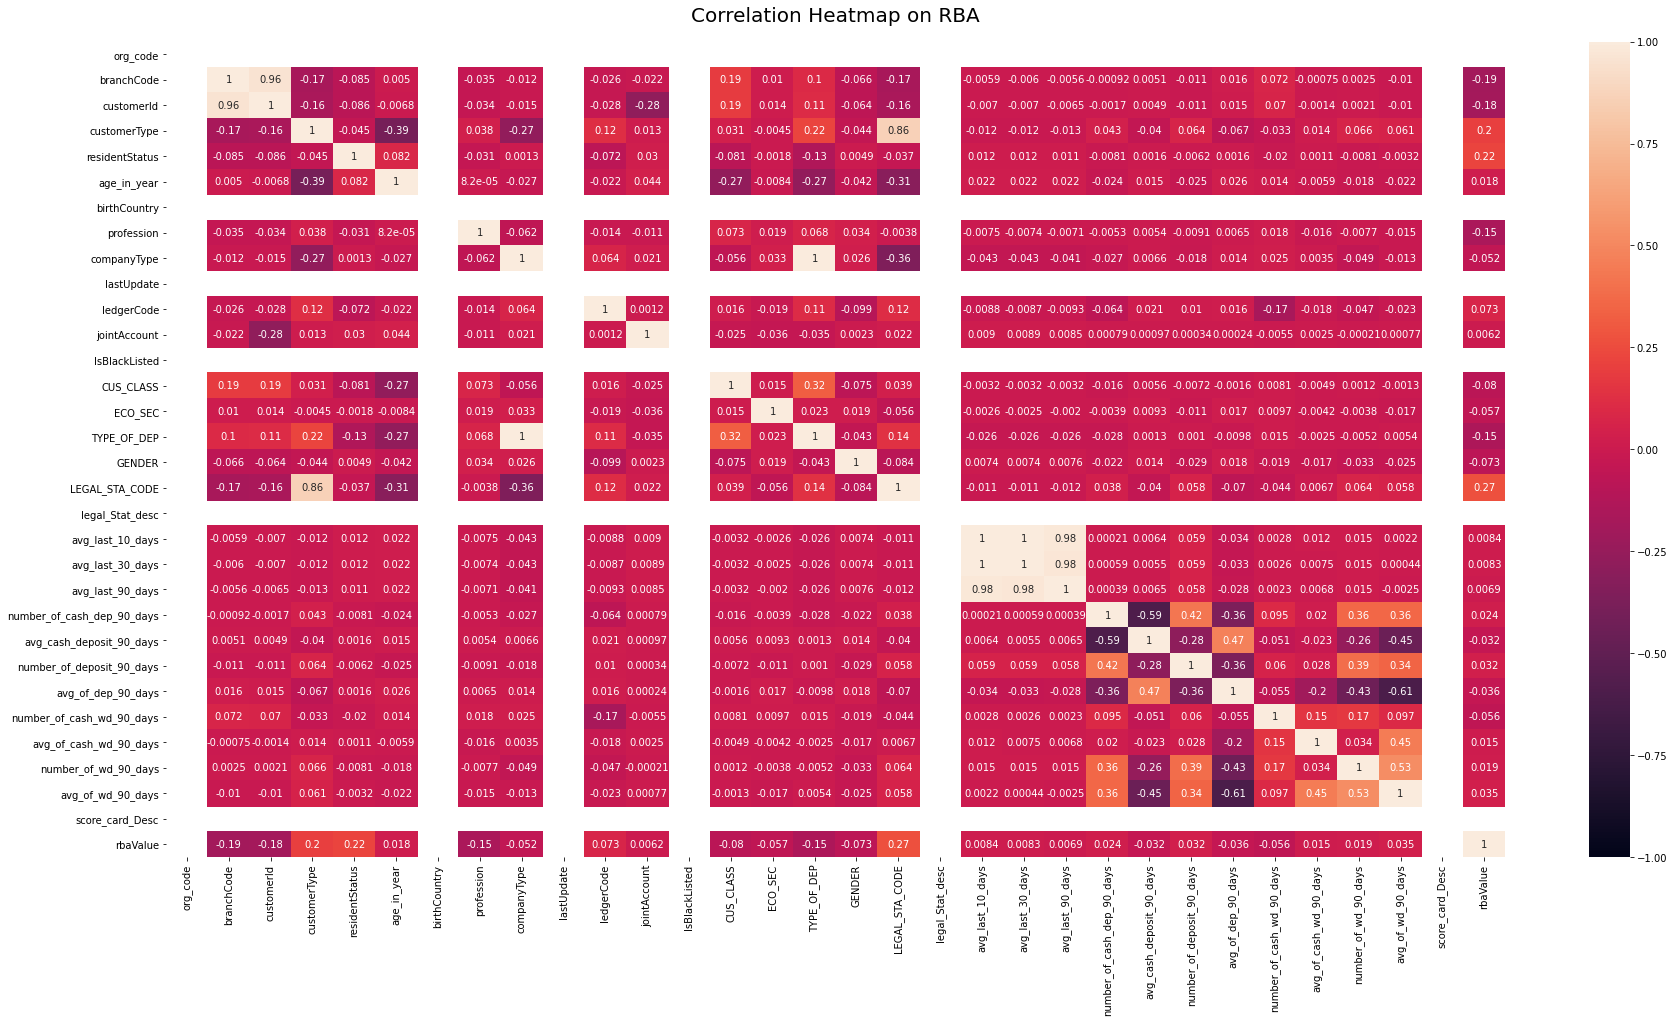

In [9]:
plt.figure(figsize=(30,15))
heatmap=sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap on RBA', fontdict={'fontsize':20},pad=20)

## Visualise the variables 

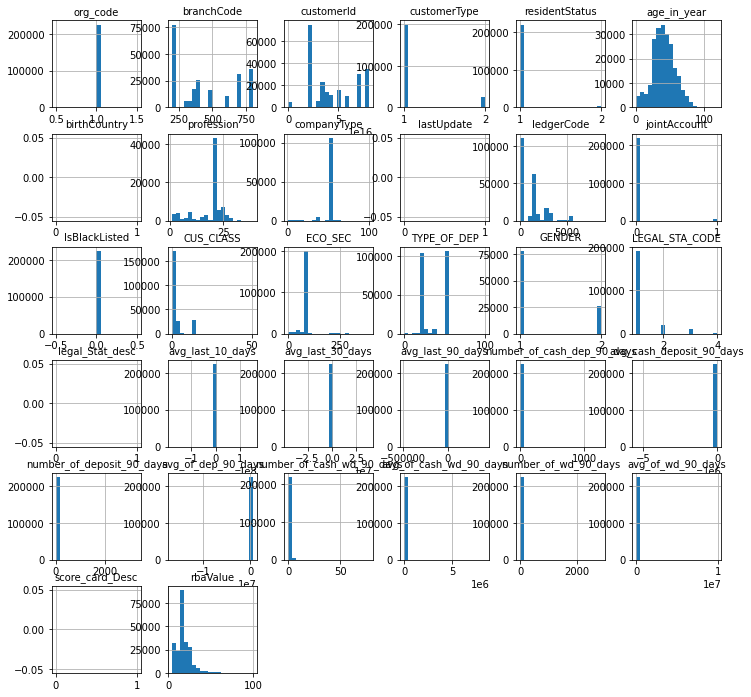

In [10]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

## Distribution of variables

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

quant_analysis = pd.DataFrame(data=outliers).rename(columns={0:'Number_of_Outliers'})
quant_analysis['Index']=quant_analysis.index
skew = pd.DataFrame(round(df.skew(),2))
skew = pd.DataFrame(data=skew).rename(columns={0:'Skewness'})
skew['Index']=skew.index

new_df = quant_analysis.merge(skew, on='Index')
new_df = new_df[["Index","Number_of_Outliers","Skewness"]]
new_df = new_df[new_df.Number_of_Outliers != 0]
new_df = new_df.set_index('Index')
new_df = new_df.drop(["companyType","customerType","profession","residentStatus","CUS_CLASS","jointAccount","ledgerCode","age_in_year","TYPE_OF_DEP","LEGAL_STA_CODE","ECO_SEC"])
new_df = new_df.style.background_gradient(subset=["Skewness"])

new_df

C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,Number_of_Outliers,Skewness
Index,,
avg_cash_deposit_90_days,24027,-94.080000
avg_last_10_days,76188,-4.700000
avg_last_30_days,75644,-5.000000
avg_last_90_days,79931,-0.750000
avg_of_cash_wd_90_days,21337,333.620000
avg_of_dep_90_days,30023,-78.740000
avg_of_wd_90_days,25290,79.560000
number_of_cash_dep_90_days,24027,90.820000
number_of_cash_wd_90_days,21337,12.870000


## Target variable visualisation 

224868
0
count    224868.000000
mean         17.624194
std           8.368345
min           4.080000
25%          13.330000
50%          16.530000
75%          21.330000
max         100.000000
Name: rbaValue, dtype: float64


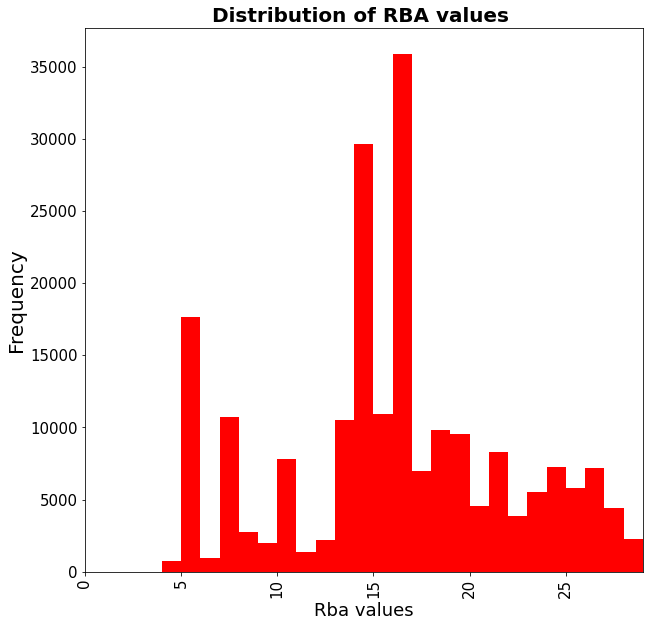

skeweness test 
1.3794762038473176


In [12]:
from matplotlib import pyplot 
#size of rba
print(len(df1['rbaValue']))
#number of nulls
print(df1['rbaValue'].isnull().sum())
#other stat
print(df1['rbaValue'].describe())


bins = range(30)
rbahist = df['rbaValue'].hist(bins = bins, figsize = (10, 10),
                                   grid = False,facecolor='r',range=(min(df['rbaValue']), max(df['rbaValue'])))
#set x axis legend to the median of the bin
plt.xlim(bins[0], bins[-1])
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
rbahist.set_xlabel('Rba values',fontsize=18)
rbahist.set_ylabel(('Frequency') ,fontsize=20)
rbahist.set_title('Distribution of RBA values ',fontsize=20,weight='bold')
plt.show()

print("skeweness test ")
data = pd.to_numeric(df['rbaValue'], downcast='integer')
print(scipy.stats.skew(data))


## Checking unique CustomerID's 

,count,mean,std,min,25%,50%,75%,max
count,75339.0,2.984749,7.689244,1.0,1.0,2.0,4.0,943.0


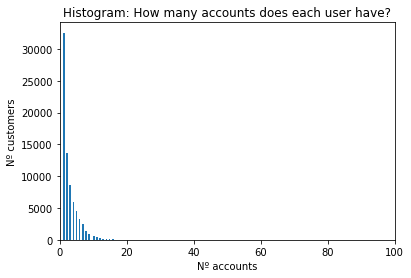

In [13]:
accountcustomer = pd.DataFrame(df.groupby(by=['customerId','fullaccount']).size()).rename(columns={0:'count'})
accountcustomer = pd.DataFrame(accountcustomer.groupby(['customerId']).size())
accountcustomer = accountcustomer.rename(columns={0:'count'})

plt.hist(accountcustomer["count"], bins=int(2000))
axes = plt.gca()
axes.set_xlim([0,100])
plt.title("Histogram: How many accounts does each user have?")
plt.xlabel("Nº accounts")
plt.ylabel("Nº customers")

accountcustomer.describe().T

In [14]:
print("The percentage of customers with more than 1 accounts is of 56,77% of the entire dataset")
print("The percentage of customers with more than 5 accounts is of 13,21% of the entire dataset")
print("The percentage of customers with more than 10 accounts is of 1,77% of the entire dataset")
print("The percentage of customers with more than 20 accounts is of 0.28% of the entire dataset. Meaning that there are 281 customers with more than 20 accounts")
# accountcustomer[accountcustomer["count"]>20].count() #How many users do hold more than a certain number of accounts?
#(accountcustomer[accountcustomer["count"]>20].count()/75339)*100 #Proportion of number of accounts

The percentage of customers with more than 1 accounts is of 56,77% of the entire dataset
The percentage of customers with more than 5 accounts is of 13,21% of the entire dataset
The percentage of customers with more than 10 accounts is of 1,77% of the entire dataset
The percentage of customers with more than 20 accounts is of 0.28% of the entire dataset. Meaning that there are 281 customers with more than 20 accounts


<p style="text-align:center; font-weight: bold;"> This dataset is very messy, therefore in our data cleaning stage we will focus on the following points:</p>

1. Normalising incoherent data from different features. Adapt the feature when possible.
2. Assesing if features are significant enough and dropping those that fail to enhance the prediction accuracy our model.
3. Identifying and removing multiple outliers.
4. Hotencode the features that we have and make some transformations based on their actual datatype.
5. Standardize values to a normal distribution 

<div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature engineering  </div> 

In [15]:
df1['Risk_Description'] = df1['rba_grade_desc']
df1.drop(['rba_grade_desc'], axis = 1, inplace = True) 

## Create the variable dateunix  in unix timestamp format for the creation date

In [16]:
import datetime
df1['creationDate']  = df1['creationDate'].astype('datetime64[ns]')
df1['dateunix'] = (df1['creationDate'].apply(lambda x: x.toordinal()) - datetime.date(1970, 1, 1).toordinal()) * 24*60*60
#Doing the same process with birthdate is impossible an entity / person might have been created / born before 1970 ! 

## Creating the variable date of birth

In [17]:
def f(end):
    global max_date
    try:
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return(0)


In [18]:
max_date = df1['date_of_assessment'].astype('datetime64[ns]').max()
df1['age'] = df1['dateOfBirth'].astype('datetime64[ns]').apply(f)
print(df1['age'].head())
print(np.mean(df1['age']))

0     0
1    29
2    29
3    29
4    29
Name: age, dtype: int64
39.58542344842307


## Creating the variable age_inday

In [19]:
today = dttime.combine(date.today(), dttime.min.time())
df1['age_inday'] = today -df1['dateOfBirth'].astype('datetime64[ns]') 
df1['age_inday'].head()

0          NaT
1   11577 days
2   11577 days
3   11577 days
4   11577 days
Name: age_inday, dtype: timedelta64[ns]

## Import metadata categories

In [20]:
#import the curency dataset as a panda dataframe joigning witht he original currency codes
currencies = pd.read_excel("currenciesmetadata.xlsx")
currencies = currencies.rename(columns={"value": "accountCurrency", "code": "country_code", "dsc":"full_country_dsc"})
df1["accountCurrency"] = df1["accountCurrency"].astype(str)
currencies["accountCurrency"] = currencies["accountCurrency"].astype(str)
df1 = df1.merge(currencies, on='accountCurrency', how='left' )

In [21]:
#import the country dataset as a panda dataframe joigning witht he original currency codes
countries = pd.read_excel("countrymetadata.xlsx")
countries = countries.rename(columns={"value": "nationalityOriginal", "code": "nationalityOriginal_code", "dsc":"nationalityOriginal_dsc"})
df1["nationalityOriginal"] = df1["nationalityOriginal"].astype(str)
countries["nationalityOriginal"] = countries["nationalityOriginal"].astype(str)
df1 = df1.merge(countries, on='nationalityOriginal', how='left' )

In [22]:
#import the ECO_SEC dataset as a panda dataframe joigning with the original ECO_SEC codes
sector = pd.read_excel("MetadataRBA.xlsx", "ECO_SEC")
sector = sector.rename(columns={"value": "ECO_SEC", "code": "ECO_SEC_code", "dsc":"ECO_SEC_dsc"})
df1["ECO_SEC"] = df1["ECO_SEC"].astype(int)
sector["ECO_SEC"] = sector["ECO_SEC"].astype(int)
df1 = df1.merge(sector, on='ECO_SEC', how='left' )

In [23]:
#import the ledger dataset as a panda dataframe joigning with the original ledger codes
ledger = pd.read_excel("MetadataRBA.xlsx", "Ledgers")
ledger = ledger.rename(columns={"value": "ledgerCode", "code": "ledger_code", "desc":"ledger_dsc"})
df1["ledgerCode"] = df1["ledgerCode"].astype(int)
ledger["ledgerCode"] = ledger["ledgerCode"].astype(int)
df1 = df1.merge(ledger, on='ledgerCode', how='left' )

In [24]:
#import the department dataset as a panda dataframe joigning with the original department codes
dep = pd.read_excel("MetadataRBA.xlsx", "Type_Of_DEP")
dep = dep.rename(columns={"value": "TYPE_OF_DEP", "code": "TYPE_OF_DEP_code", "dsc":"TYPE_OF_DEP_dsc"})
df1["TYPE_OF_DEP"] = df1["TYPE_OF_DEP"].astype(int)
dep["TYPE_OF_DEP"] = dep["TYPE_OF_DEP"].astype(int)
df1 = df1.merge(dep, on='TYPE_OF_DEP', how='left' )

In [25]:
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,score_card_Desc,rbaValue,Risk_Description,dateunix,age,age_inday,country_code,full_country_dsc,nationalityOriginal_code,nationalityOriginal_dsc,ECO_SEC_code,ECO_SEC_dsc,ledger_code,dsc,TYPE_OF_DEP_code,TYPE_OF_DEP_dsc
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,E-Existing,NaN,13.20,Low,1428192000,0,NaT,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,نشاطات تجارية اخرى,RBA_ledger_Med,مشتركي اسناد قرض شركة بندار للتجارة,RBA_TDEP_Medium,شركات مساهمة عامة
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,سلف موظفين,RBA_TDEP_Low,موظف لدى البنك
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,قرض شخصي,RBA_TDEP_Low,موظف لدى البنك
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,توفيري كلاسيك,RBA_TDEP_Low,موظف لدى البنك
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,جاري,RBA_TDEP_Low,موظف لدى البنك


## Adapt currency with exchange rate 

In [26]:
#Import a currency dataset to have the English pound as a base value for analysis 
#month of January 2021 used as baseline
exchange = pd.read_csv("poundexch.csv")
print(exchange.head())
exchange = exchange.drop(['Country/Territories','Currency','Start Date','End Date'], axis = 1)
exchange = exchange.rename(columns={"Currency Code": "accountCurrency"})
df1 = df1.merge(exchange, on='accountCurrency', how='left' )

  Country/Territories Currency Currency Code  Currency units per one pound   \
0           Argentina     Peso           ARS                       117.6700   
1           Australia   Dollar           AUD                         1.7604   
2              Brazil     Real           BRL                         7.2223   
3              Canada   Dollar           CAD                         1.7215   
4             Denmark    Krone           DKK                         8.3763   

   Start Date    End Date  
0  01/02/2021  28/02/2021  
1  01/02/2021  28/02/2021  
2  01/02/2021  28/02/2021  
3  01/02/2021  28/02/2021  
4  01/02/2021  28/02/2021  


In [27]:
print(len(df1["Currency units per one pound "]))
len(df1["avg_last_10_days"])

225199


225199

In [28]:
currencycol = ['avg_last_10_days','avg_last_30_days', 'avg_last_90_days','avg_cash_deposit_90_days','avg_of_dep_90_days','avg_of_cash_wd_90_days','avg_of_wd_90_days']
currencycol

['avg_last_10_days',
 'avg_last_30_days',
 'avg_last_90_days',
 'avg_cash_deposit_90_days',
 'avg_of_dep_90_days',
 'avg_of_cash_wd_90_days',
 'avg_of_wd_90_days']

In [29]:
#Check the currency convertion
print(df1.loc[0:10,'avg_last_10_days'])
for ccol in currencycol:
    df1[ccol] = round(df1[[ccol]].multiply(df1["Currency units per one pound "], axis="index"),2)
print(df1.loc[0:10,'avg_last_10_days'])

0     8610000.00
1           0.00
2     -137562.72
3        2079.79
4         444.00
5           0.00
6           0.00
7          24.60
8           0.00
9           0.00
10       2569.65
Name: avg_last_10_days, dtype: float64
0     8321565.00
1           0.00
2     -132954.37
3        2010.12
4         429.13
5           0.00
6           0.00
7          23.78
8           0.00
9           0.00
10       2483.57
Name: avg_last_10_days, dtype: float64


 <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Preprocessing </div> 

## Missing values

In [30]:
# Percentage of missing values identifyied with "null"
print(100*df1.isnull().sum()/df1.isnull().count())

org_code                         0.000000
branchCode                       0.000000
customerId                       0.000000
fullaccount                      0.000000
customerType                     0.000000
                                   ...   
ledger_code                      7.465397
dsc                              7.465397
TYPE_OF_DEP_code                 0.000000
TYPE_OF_DEP_dsc                  0.000000
Currency units per one pound     0.124779
Length: 61, dtype: float64


In [31]:
#Other metrics for null values: interrogation mark 
for name in df1.columns:
    li = []
    for el in df1[name].astype(str):
        li.append(len(re.findall("\?.*",el)))
    print(name)
    print(100 * sum(li) / len(df1[name]))

org_code
0.0
branchCode
0.0
customerId
0.0
fullaccount
0.0
customerType
0.0
creationDate
0.0
onboarding
0.0
residentStatus
0.0
residentCountry
0.0
nationalityOriginal
0.0
extraNationality
0.0
dateOfBirth
0.0
age_in_year
0.0
birthCountry
0.0
birthPlace
89.22330916211884
profession
0.0
companyType
0.0
giinCode
0.0
lastUpdate
0.0
status
0.0
ledgerCode
0.0
accountCurrency
0.0
jointAccount
0.0
IsBlackListed
0.0
CUS_CLASS
0.0
ECO_SEC
0.0
TYPE_OF_DEP
0.0
GENDER
0.0
LEGAL_STA_CODE
0.0
legal_Stat_desc
0.0
avg_last_10_days
0.0
avg_last_30_days
0.0
avg_last_90_days
0.0
number_of_cash_dep_90_days
0.0
avg_cash_deposit_90_days
0.0
number_of_deposit_90_days
0.0
avg_of_dep_90_days
0.0
number_of_cash_wd_90_days
0.0
avg_of_cash_wd_90_days
0.0
number_of_wd_90_days
0.0
avg_of_wd_90_days
0.0
date_of_assessment
0.0
rbaGradeAbrv
0.0
score_card
0.0
score_card_Desc
0.0
rbaValue
0.0
Risk_Description
0.0
dateunix
0.0
age
0.0
age_inday
0.0
country_code
0.0
full_country_dsc
0.0
nationalityOriginal_code
0.0
nationa

- birthplace  has 89.3% ? mark + 9.7% of missing values = 99% missing data

In [32]:
#check for string na
    #assign null if n/a as string 
def inter(df):
    summed = []
    for col in df.columns:
        indiv = []
        for el in df[col].astype(str):
            if el == 'nan' or el == 'NaN' or el == ' ':
                indiv.append(el)
        summed.append(col)
        summed.append(100 * len(indiv) / len(df[col]))
        df[col].loc[el] = None
    return [summed,df]

result = inter(df1)
print(result[0])
df1 = result[1]

['org_code', 0.0, 'branchCode', 0.0, 'customerId', 0.0, 'fullaccount', 0.0, 'customerType', 0.0, 'creationDate', 0.0, 'onboarding', 0.0, 'residentStatus', 0.0, 'residentCountry', 0.26731912663910584, 'nationalityOriginal', 1.5306462284468403, 'extraNationality', 99.20381529225263, 'dateOfBirth', 2.108801548852348, 'age_in_year', 2.108801548852348, 'birthCountry', 100.0, 'birthPlace', 9.796224672400854, 'profession', 64.56645011745168, 'companyType', 49.0170915501401, 'giinCode', 99.99467137953543, 'lastUpdate', 100.0, 'status', 0.0, 'ledgerCode', 0.0, 'accountCurrency', 0.0, 'jointAccount', 0.0, 'IsBlackListed', 0.0, 'CUS_CLASS', 0.0, 'ECO_SEC', 0.0, 'TYPE_OF_DEP', 0.0, 'GENDER', 53.63611738950883, 'LEGAL_STA_CODE', 1.161639261275583, 'legal_Stat_desc', 100.0, 'avg_last_10_days', 0.12477852921194144, 'avg_last_30_days', 0.12477852921194144, 'avg_last_90_days', 0.12477852921194144, 'number_of_cash_dep_90_days', 0.0, 'avg_cash_deposit_90_days', 0.12477852921194144, 'number_of_deposit_90_

# Missing values
1. Drop the 98% and above missing values column 
2. Drop duplicate column
2. Inspect the column with a single value 
3. Impute or/and drop remaining missing values 

**Drop the 98% and above missing values column**

In [33]:
#Dropping 100% missing value column 
df1 = df1.drop(["score_card_Desc","birthCountry","lastUpdate","legal_Stat_desc","giinCode","birthPlace","extraNationality"], axis = 1)
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,dateOfBirth,age_in_year,profession,companyType,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,rbaValue,Risk_Description,dateunix,age,age_inday,country_code,full_country_dsc,nationalityOriginal_code,nationalityOriginal_dsc,ECO_SEC_code,ECO_SEC_dsc,ledger_code,dsc,TYPE_OF_DEP_code,TYPE_OF_DEP_dsc,Currency units per one pound
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,35.0,Active,5817,JOD,0,0,4,46,35,NaN,2.0,8321565.00,2097305.00,22551.66,0,0.00,0,0.00,0,0.00,0,0.00,2019-01-24,L,E-Existing,13.20,Low,1428192000,0,NaT,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,نشاطات تجارية اخرى,RBA_ledger_Med,مشتركي اسناد قرض شركة بندار للتجارة,RBA_TDEP_Medium,شركات مساهمة عامة,0.9665
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,0.00,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2019-01-24,L,I-Existing,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,سلف موظفين,RBA_TDEP_Low,موظف لدى البنك,0.9665
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,-132954.37,-33510.99,-357.42,0,0.00,0,0.00,0,0.00,0,0.00,2019-01-24,L,I-Existing,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,قرض شخصي,RBA_TDEP_Low,موظف لدى البنك,0.9665
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,2010.12,509.22,6.46,4,-531.58,4,-531.58,1,48.32,1,48.32,2019-01-24,L,I-Existing,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,توفيري كلاسيك,RBA_TDEP_Low,موظف لدى البنك,0.9665
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,1989-06-30,30.0,27.0,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,429.13,116.46,0.92,4,-521.91,4,-521.91,1,54.12,1,54.12,2019-01-24,L,I-Existing,16.93,Low,1379376000,29,11577 days,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,جاري,RBA_TDEP_Low,موظف لدى البنك,0.9665


**Drop duplicate column**

In [34]:
#Dropping duplicate columns
df1 = df1.drop(["age_in_year"], axis = 1)

**Inspect the column with a single value**

In [35]:
#check for other column with a single value 
print({col: df1[col].nunique() for col in df1.columns})
print("")
#Org_code, status,isBlackListed,date_of_assessment have only 1 values; flag variable ??
print({col: pd.Series(df1[col]).drop_duplicates().tolist() for col in df1.columns if df1[col].nunique() == 1})
#see below the unique value text to check for a flag or not: if it has null values it could be that the user input a 
#value for a scenario such as blacklisted or let as null if not 
{col: pd.Series(df1[col]).isna().sum() for col in df1.columns if df1[col].nunique() == 1}
#no missing values for the selected collumn, the above theory does not apply to any of the collumn, they are to be dropped

df1 = df1.drop(["org_code","status","IsBlackListed","date_of_assessment"], axis = 1)

{'org_code': 1, 'branchCode': 30, 'customerId': 75339, 'fullaccount': 220434, 'customerType': 2, 'creationDate': 7041, 'onboarding': 2, 'residentStatus': 2, 'residentCountry': 62, 'nationalityOriginal': 68, 'dateOfBirth': 21457, 'profession': 32, 'companyType': 33, 'status': 1, 'ledgerCode': 227, 'accountCurrency': 20, 'jointAccount': 2, 'IsBlackListed': 1, 'CUS_CLASS': 10, 'ECO_SEC': 206, 'TYPE_OF_DEP': 51, 'GENDER': 2, 'LEGAL_STA_CODE': 4, 'avg_last_10_days': 106267, 'avg_last_30_days': 93987, 'avg_last_90_days': 37378, 'number_of_cash_dep_90_days': 151, 'avg_cash_deposit_90_days': 5990, 'number_of_deposit_90_days': 293, 'avg_of_dep_90_days': 11468, 'number_of_cash_wd_90_days': 45, 'avg_of_cash_wd_90_days': 5578, 'number_of_wd_90_days': 259, 'avg_of_wd_90_days': 8915, 'date_of_assessment': 1, 'rbaGradeAbrv': 3, 'score_card': 4, 'rbaValue': 692, 'Risk_Description': 3, 'dateunix': 7041, 'age': 108, 'age_inday': 21457, 'country_code': 3, 'full_country_dsc': 20, 'nationalityOriginal_code

**Impute or/and drop remaining missing values**

In [36]:
######Check for companies######
companies = df1[(df1.companyType == 51)]
print(companies.describe())
print(100*companies.isnull().sum()/companies.isnull().count())
print("how many companies are there ?" + str(len(companies)))
#we can see only a very few company type are missing compared to the overall dtb ratio (49%) so we are really talking about companies !
#the following fields are set as null for companies; Gender, profession lets remedy  it !

         branchCode    customerId  customerType  residentStatus    profession  \
count  89324.000000  8.932400e+04  89324.000000    89324.000000  38429.000000   
mean     510.572657  5.037969e+16      1.000582        1.002788     18.718572   
std      228.828829  2.345291e+16      0.024121        0.052724      5.624018   
min      202.000000  2.020032e+09      1.000000        1.000000      1.000000   
25%      302.000000  2.090094e+16      1.000000        1.000000     20.000000   
50%      502.000000  5.020033e+16      1.000000        1.000000     20.000000   
75%      704.000000  7.040077e+16      1.000000        1.000000     21.000000   
max      805.000000  8.052727e+16      2.000000        2.000000     33.000000   

       companyType    ledgerCode  jointAccount     CUS_CLASS       ECO_SEC  \
count      89324.0  89324.000000  89324.000000  89324.000000  89324.000000   
mean          51.0   1115.265696      0.013031      5.549617     89.810420   
std            0.0   1150.925081    

In [37]:
df1['GENDER'] = df1['GENDER'].fillna(0).replace('NaN',0)
#if it is a company the value is filled with 0 if the value is an integer or 'company' if the value is a string
df1['companyType'] = df1['companyType'].fillna(0).replace('NaN',0)
df1['dateOfBirth'] = df1['dateOfBirth'].fillna("00/00/0000").replace('NaN',"00/00/0000")
df1['profession'] = df1['profession'].fillna(0).replace('NaN',0)

In [38]:
#Inspecting the remaining null values 
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.000000
customerId                       0.000000
fullaccount                      0.000000
customerType                     0.000000
creationDate                     0.000000
onboarding                       0.000000
residentStatus                   0.000000
residentCountry                  0.267319
nationalityOriginal              0.000000
dateOfBirth                      0.000000
profession                       0.000000
companyType                      0.000000
ledgerCode                       0.000000
accountCurrency                  0.000000
jointAccount                     0.000000
CUS_CLASS                        0.000000
ECO_SEC                          0.000000
TYPE_OF_DEP                      0.000000
GENDER                           0.000000
LEGAL_STA_CODE                   1.161639
avg_last_10_days                 0.124779
avg_last_30_days                 0.124779
avg_last_90_days                 0.124779
number_of_cash_dep_90_days       0

In [39]:
#droppping the few nas left
df1 = df1.dropna(axis=0,how='any') 
#Drop duplicates 
df1 = df1.drop(["rbaGradeAbrv"], axis = 1)

In [40]:
#Confirm absence of null values
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.0
customerId                       0.0
fullaccount                      0.0
customerType                     0.0
creationDate                     0.0
onboarding                       0.0
residentStatus                   0.0
residentCountry                  0.0
nationalityOriginal              0.0
dateOfBirth                      0.0
profession                       0.0
companyType                      0.0
ledgerCode                       0.0
accountCurrency                  0.0
jointAccount                     0.0
CUS_CLASS                        0.0
ECO_SEC                          0.0
TYPE_OF_DEP                      0.0
GENDER                           0.0
LEGAL_STA_CODE                   0.0
avg_last_10_days                 0.0
avg_last_30_days                 0.0
avg_last_90_days                 0.0
number_of_cash_dep_90_days       0.0
avg_cash_deposit_90_days         0.0
number_of_deposit_90_days        0.0
avg_of_dep_90_days               0.0
n

In [41]:
#remove the string 'day' from the collumn and convert it to a continuous variable
df1['age_inday'] = [re.findall("[0-9]+",val)[0] for val in df1['age_inday'].astype(str)]
df1['age_inday'] = df1['age_inday'].astype(int)
df1['age_inday'].head()

1    11577
2    11577
3    11577
4    11577
5    11577
Name: age_inday, dtype: int32

In [42]:
#Remaining collumn rows 
df1['customerId'].count()

201336

## Importing metadata based on cleaned collumns 

In [43]:
#import the profession dataset as a panda dataframe joigning with the original profession codes
profession = pd.read_excel("MetadataRBA.xlsx", "Profession")
profession = profession.rename(columns={"Value": "profession", "Code": "profession_code", "Description":"prof_dsc"})
df1["profession"] = df1["profession"].astype(int)
df1 = df1.merge(profession, on='profession', how='left' )

In [44]:
#import the Legal_STA_Code dataset as a panda dataframe joigning with the original Legal_STA_Code codes
legal = pd.read_excel("MetadataRBA.xlsx", "Type_Of_DEP")
legal = legal.rename(columns={"value": "LEGAL_STA_CODE", "code": "LEGAL_STA_CODE_code", "dsc":"LEGAL_STA_CODE_dsc"})
df1["LEGAL_STA_CODE"] = df1["LEGAL_STA_CODE"].astype(int)
legal["LEGAL_STA_CODE"] = legal["LEGAL_STA_CODE"].astype(int)
df1 = df1.merge(legal, on='LEGAL_STA_CODE', how='left' )

# Cleaning data types

**Getting rid of the letters with numeric collumns**

In [45]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def clear_backslash(text):
    ''' Function to clear backslash as they cause all sort of troubles '''
    result = text
    if "\\" in text:
        result = '0'
    return (result)

In [46]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def text_to_num(text):
    ''' DOC STRING: Function to transform numbers with letter into pure numbers, example: 3.17B into 3,170,000,000 '''
    if type(text) != str:
        return(text)
    result = 0.0  
    text = text.replace(",", "")  
    try:
            if text[-1] in d:
                num, magnitude = text[:-1], text[-1]
                result = float(num) * (10 ** d[magnitude])  #this case is when "text" has T, B, M, k or %
            else:
                result = float(text) #this case is when "text" is string but look like a numeric
    except:
        try:
            result = 1.0*text #this is when "text" is already numeric
        except:
            result = text #it will reach this case when it is impossible to transform into numeric
    return(result)

In [47]:
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df1[fieldname].astype(str))
        df1[fieldname] = np.vectorize(text_to_num)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
dateOfBirth
profession
companyType
ledgerCode
accountCurrency
jointAccount
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
score_card
rbaValue
Risk_Description
dateunix
age
age_inday
country_code
full_country_dsc
nationalityOriginal_code
nationalityOriginal_dsc
ECO_SEC_code
ECO_SEC_dsc
ledger_code
dsc
TYPE_OF_DEP_code
TYPE_OF_DEP_dsc
Currency units per one pound 
profession_code
prof_dsc
LEGAL_STA_CODE_code
LEGAL_STA_CODE_dsc


**Set numeric values to absolute - getting rid of minus sign**

In [48]:
#Delete the minus sign in cash deposit
def nominus(t):
    t = t.replace("-", "")  
    return t
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df1[fieldname].astype(str))
        df1[fieldname] = np.vectorize(nominus)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
dateOfBirth
profession
companyType
ledgerCode
accountCurrency
jointAccount
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
score_card
rbaValue
Risk_Description
dateunix
age
age_inday
country_code
full_country_dsc
nationalityOriginal_code
nationalityOriginal_dsc
ECO_SEC_code
ECO_SEC_dsc
ledger_code
dsc
TYPE_OF_DEP_code
TYPE_OF_DEP_dsc
Currency units per one pound 
profession_code
prof_dsc
LEGAL_STA_CODE_code
LEGAL_STA_CODE_dsc


In [49]:
#set dummy values for onboarding
def categorize(text):
    if text == 'Y':
        text = 1
    else :
        text = 0
    return text 
df1['onboarding'] = np.vectorize(categorize)(df1['onboarding'])

In [50]:
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                       0.0
customerId                       0.0
fullaccount                      0.0
customerType                     0.0
creationDate                     0.0
onboarding                       0.0
residentStatus                   0.0
residentCountry                  0.0
nationalityOriginal              0.0
dateOfBirth                      0.0
profession                       0.0
companyType                      0.0
ledgerCode                       0.0
accountCurrency                  0.0
jointAccount                     0.0
CUS_CLASS                        0.0
ECO_SEC                          0.0
TYPE_OF_DEP                      0.0
GENDER                           0.0
LEGAL_STA_CODE                   0.0
avg_last_10_days                 0.0
avg_last_30_days                 0.0
avg_last_90_days                 0.0
number_of_cash_dep_90_days       0.0
avg_cash_deposit_90_days         0.0
number_of_deposit_90_days        0.0
avg_of_dep_90_days               0.0
n

# Standardization

In [51]:
#Set up a column, 'outbounds' for outliers, as we are searching for fraud we will NOT replace outliers
def distribution(x):
    try:
        x.dropna()
        #umbalanced dataset: ets take the average of values that are not 0
        data_1 = np.ma.masked_where(x == 0, x)
        stdev = np.std(data_1)
        meanf = np.average(data_1)
        #replace measure of outlier here 
        H = round(meanf + 2 * stdev,0)
        L = round(meanf - 2 * stdev,0)
        if (L < 0):
            L = 0
        out = [H,L]
        return(out)
    except:
        pass 

#compare with each value to the respective column lower and higher bounds for outliers (bounds defined in distribution fun)
def outliers(x):
    dt = pd.DataFrame(x)
    limit = x.apply(distribution)
    y = pd.DataFrame()
    print(limit)
    #check how many outlier the row pocesses
    dt['outbounds'] = 0
    try:
        for el in dt.columns:
            #check if there are less than 2 values (no flag variables)
            if (dt[el].nunique() < 3):
                continue
            #unique to our dataset _ no codes or id or target variable 
            if ((el == 'outbounds')):
                continue
            print(el)
            high = limit[el].iloc[0]
            low = limit[el].iloc[1]
            #imbalanced dataset what quantile to use ?
            Q1 = dt[el].quantile(0.25).copy()
            Q3 = dt[el].quantile(0.75).copy()
            count = 0
            for ele in dt[el]:
                if (ele > high):
                    y = y.append([[el, high,low, ele]])
                    #Impute the 75th perc if an outlier over the Hlimit
                    #dt.loc[count,el] = Q1
                    dt.iloc[count,11] =   1
                    #dt.set_value(count, 'outbounds', 1) 
                elif (ele < low): 
                    y = y.append([[el, high,low, ele]])
                    #Impute the 25th perc if an outlier below the Llimit
                    #dt.loc[count,el] = Q3
                    dt.iloc[count,11] =   1
                count += 1
    except:
            print(el + " not proper for outlier analysis ") 
    y.columns =[ 'column', 'Hlimit', 'Llimit' ,'value']
    return([y, dt])

b= outliers(df1.iloc[:,20:31].apply(pd.to_numeric))
dt_outliers = b[1]

listO = b[0]





   avg_last_10_days  avg_last_30_days  avg_last_90_days  \
0       149215556.0        37825249.0          440324.0   
1               0.0               0.0               0.0   

   number_of_cash_dep_90_days  avg_cash_deposit_90_days  \
0                        30.0                  188166.0   
1                         0.0                       0.0   

   number_of_deposit_90_days  avg_of_dep_90_days  number_of_cash_wd_90_days  \
0                      114.0            450009.0                        8.0   
1                        0.0                 0.0                        0.0   

   avg_of_cash_wd_90_days  number_of_wd_90_days  avg_of_wd_90_days  
0                179437.0                  71.0           344811.0  
1                     0.0                   0.0                0.0  
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
nu

In [52]:
len(dt_outliers)

201336

In [53]:
df1 = pd.concat([df1,dt_outliers['outbounds']], axis=1)

In [54]:
df1.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,dateOfBirth,profession,companyType,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,rbaValue,Risk_Description,dateunix,age,age_inday,country_code,full_country_dsc,nationalityOriginal_code,nationalityOriginal_dsc,ECO_SEC_code,ECO_SEC_dsc,ledger_code,dsc,TYPE_OF_DEP_code,TYPE_OF_DEP_dsc,Currency units per one pound,profession_code,prof_dsc,LEGAL_STA_CODE_code,LEGAL_STA_CODE_dsc,outbounds
0,202,20200207860000638,020200207860011330000,1,20130917,0,1,JO,JO,19890630,27,0.0,1330,JOD,0,2,90,23,2.0,1,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,IExisting,16.93,Low,1379376000,29,11577,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,سلف موظفين,RBA_TDEP_Low,موظف لدى البنك,0.9665,RBA_PROF_High,موظف بنك,RBA_TDEP_Low,مؤسّسات حكوميّة ضمن الموازنة,0
1,202,20200207860000638,020200207860011389002,1,20130917,0,1,JO,JO,19890630,27,0.0,1389,JOD,0,2,90,23,2.0,1,132954.37,33510.99,357.42,0,0.0,0,0.0,0,0.0,0,0.0,IExisting,16.93,Low,1379376000,29,11577,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,قرض شخصي,RBA_TDEP_Low,موظف لدى البنك,0.9665,RBA_PROF_High,موظف بنك,RBA_TDEP_Low,مؤسّسات حكوميّة ضمن الموازنة,0
2,202,20200207860000638,020200207860010060000,1,20130917,0,1,JO,JO,19890630,27,0.0,60,JOD,0,2,90,23,2.0,1,2010.12,509.22,6.46,4,531.58,4,531.58,1,48.32,1,48.32,IExisting,16.93,Low,1379376000,29,11577,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,توفيري كلاسيك,RBA_TDEP_Low,موظف لدى البنك,0.9665,RBA_PROF_High,موظف بنك,RBA_TDEP_Low,مؤسّسات حكوميّة ضمن الموازنة,0
3,202,20200207860000638,020200207860010010000,1,20130917,0,1,JO,JO,19890630,27,0.0,10,JOD,0,2,90,23,2.0,1,429.13,116.46,0.92,4,521.91,4,521.91,1,54.12,1,54.12,IExisting,16.93,Low,1379376000,29,11577,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,جاري,RBA_TDEP_Low,موظف لدى البنك,0.9665,RBA_PROF_High,موظف بنك,RBA_TDEP_Low,مؤسّسات حكوميّة ضمن الموازنة,0
4,202,20200207860000638,020200207860011355003,1,20130917,0,1,JO,JO,19890630,27,0.0,1355,JOD,0,2,90,23,2.0,1,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,IExisting,16.93,Low,1379376000,29,11577,RBA_Currency_Low,Jordanian Dinar,RBA_Countries_Low,JORDAN,RBA_ECO_SEC_Low,الافراد,RBA_Ledger_Low,قرض شخصي,RBA_TDEP_Low,موظف لدى البنك,0.9665,RBA_PROF_High,موظف بنك,RBA_TDEP_Low,مؤسّسات حكوميّة ضمن الموازنة,0


In [55]:
listO

,column,Hlimit,Llimit,value
0,avg_last_10_days,149215556.0,0.0,2.528541e+10
0,avg_last_10_days,149215556.0,0.0,7.623720e+08
0,avg_last_10_days,149215556.0,0.0,7.623720e+08
0,avg_last_10_days,149215556.0,0.0,3.388320e+08
0,avg_last_10_days,149215556.0,0.0,2.540430e+08
...,...,...,...,...
0,avg_of_wd_90_days,344811.0,0.0,1.499164e+06
0,avg_of_wd_90_days,344811.0,0.0,8.604653e+05
0,avg_of_wd_90_days,344811.0,0.0,9.040680e+05
0,avg_of_wd_90_days,344811.0,0.0,4.180978e+05


In [56]:
#set dummy for withdrawals and deposits 
#set on masked values for deposits and withdrawals above 0
#Has to be done before normelising the variable
def categorize_D(text):
    if text != '0.0':
        if float(text) > 10:
            text = "1"
        else :
            text = "0"
    return text 
def categorize_W(text):
    if text != '0.0':
        if float(text) > 15:
            text = "1"
        else :
            text = "0"
    return text 
df1['deposits_dummies'] = np.vectorize(categorize_D)(df1['number_of_deposit_90_days'])
df1['withdrawals_dummies']  = np.vectorize(categorize_W)(df1['number_of_wd_90_days'])

In [57]:
print("Target variable")
print("skeness higher than one in the shapiro test, highly skewed, lets take the logarithm of RBA") 
print(scipy.stats.skew(np.log2(data)))

Target variable
skeness higher than one in the shapiro test, highly skewed, lets take the logarithm of RBA
-0.525713125149002


In [58]:
#Standardizing the target variable, rbavalue
dt2 = df1.iloc[:,32:33]
scaler = StandardScaler()
scaler.fit(dt2)
print(scaler.mean_)
df_scaling1 = scaler.transform(dt2)
df1.iloc[:,32:33]  = df_scaling1

[17.56178602]


**Independent variables**

In [59]:
#Normelize the dollar value of deposit and withdrawals
df_scaling = df1.iloc[:,20:31]

In [60]:
dat = df_scaling
scaler = StandardScaler()
scaler.fit(dat)
print(scaler.mean_)
df_scaling = scaler.transform(dat)
df1.iloc[:,20:31] = df_scaling

[2.21468077e+05 5.37313857e+04 5.64662241e+02 5.06943617e-01
 1.11412731e+03 1.17123118e+00 3.36459008e+03 2.78499623e-01
 5.30970008e+02 8.50036754e-01 2.29190830e+03]


# Encoding features 

In [61]:
# pandas get dummies 
print(df1.Risk_Description.unique())
df1 = pd.concat([df1, pd.get_dummies(df1['Risk_Description'])], axis=1); 

['Low' 'Medium' 'High']


In [62]:
df1 = df1.rename(columns={"Low": "Risk_low", "Medium": "Risk_medium", "High":"Risk_high"})

In [63]:
#pattern for added metadata
Code_pattern = list()
for col in df1.columns: 
    print(col)
    pat = re.findall(".*_code.*",col)
    if pat != []:
        Code_pattern.append(pat)
Code_pattern_2 = list()
for col in df1.columns: 
    pat = re.findall(".*dsc.*",col)
    if pat != []:
        Code_pattern_2.append(pat)

branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
dateOfBirth
profession
companyType
ledgerCode
accountCurrency
jointAccount
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
score_card
rbaValue
Risk_Description
dateunix
age
age_inday
country_code
full_country_dsc
nationalityOriginal_code
nationalityOriginal_dsc
ECO_SEC_code
ECO_SEC_dsc
ledger_code
dsc
TYPE_OF_DEP_code
TYPE_OF_DEP_dsc
Currency units per one pound 
profession_code
prof_dsc
LEGAL_STA_CODE_code
LEGAL_STA_CODE_dsc
outbounds
deposits_dummies
withdrawals_dummies
Risk_high
Risk_low
Risk_medium


In [64]:
for el in Code_pattern:
    print(el[0])

country_code
nationalityOriginal_code
ECO_SEC_code
ledger_code
TYPE_OF_DEP_code
profession_code
LEGAL_STA_CODE_code


In [65]:
for el in Code_pattern:
    print(el[0])
    df1 = pd.concat([df1, pd.get_dummies(df1[el[0]])], axis=1)
    df1 = df1.drop([el[0]], axis = 1)
for el in Code_pattern_2:
    print(el[0])
    df1 = df1.drop([el[0]], axis = 1)

country_code
nationalityOriginal_code
ECO_SEC_code
ledger_code
TYPE_OF_DEP_code
profession_code
LEGAL_STA_CODE_code
full_country_dsc
nationalityOriginal_dsc
ECO_SEC_dsc
dsc
TYPE_OF_DEP_dsc
prof_dsc
LEGAL_STA_CODE_dsc


In [66]:
# dropping the dummified collumns 
df1 = df1.drop(['profession','nationalityOriginal','ledgerCode','accountCurrency','ECO_SEC','TYPE_OF_DEP','LEGAL_STA_CODE',"Currency units per one pound "], axis = 1)

In [67]:
#flag variable for compagnies
df1 = df1.rename(columns={"nan": "Company"})

In [68]:
#score card to dummies 
print(df1.score_card.unique())
df1 = pd.concat([df1, pd.get_dummies(df1['score_card'])], axis=1); 
df1 = df1.drop(['score_card'], axis = 1)

['IExisting' 'EExisting' 'INew' 'ENEW']


In [69]:
df1.head(10)

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue,Risk_Description,dateunix,age,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,RBA_TDEP_Low,EExisting,ENEW,IExisting,INew
0,202,20200207860000638,020200207860011330000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,202,20200207860000638,020200207860011389002,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.001568,-0.001423,-0.001356,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,202,20200207860000638,020200207860010060000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003889,-0.003745,-0.003651,0.777724,-0.019133,0.139461,-0.034848,0.593402,-0.017110,0.013260,-0.039468,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,202,20200207860000638,020200207860010010000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003917,-0.003773,-0.003688,0.777724,-0.019450,0.139461,-0.034967,0.593402,-0.016904,0.013260,-0.039366,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,202,20200207860000638,020200207860011355003,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5,202,20200207860000638,020200207860011355002,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
6,202,20200207860000638,020200207860013284000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003693,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
7,202,20200207860000638,020200207860011389000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
8,202,20200207860000638,020200207860011389001,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
9,202,20200217770000674,020200217770011400000,2,20131003,0,1,JO,19760404,0.0,0,2,0.0,-0.003852,-0.003709,-0.003621,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.517521,Low,1380758400,42,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0


In [70]:
print(100*df1.isnull().sum()/df1.isnull().count())

branchCode                    0.0
customerId                    0.0
fullaccount                   0.0
customerType                  0.0
creationDate                  0.0
onboarding                    0.0
residentStatus                0.0
residentCountry               0.0
dateOfBirth                   0.0
companyType                   0.0
jointAccount                  0.0
CUS_CLASS                     0.0
GENDER                        0.0
avg_last_10_days              0.0
avg_last_30_days              0.0
avg_last_90_days              0.0
number_of_cash_dep_90_days    0.0
avg_cash_deposit_90_days      0.0
number_of_deposit_90_days     0.0
avg_of_dep_90_days            0.0
number_of_cash_wd_90_days     0.0
avg_of_cash_wd_90_days        0.0
number_of_wd_90_days          0.0
avg_of_wd_90_days             0.0
rbaValue                      0.0
Risk_Description              0.0
dateunix                      0.0
age                           0.0
age_inday                     0.0
outbounds     

In [71]:
len(df1)

201336

## Grouping features 

In [72]:
df1.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue,Risk_Description,dateunix,age,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,RBA_TDEP_Low,EExisting,ENEW,IExisting,INew
0,202,20200207860000638,020200207860011330000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,202,20200207860000638,020200207860011389002,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.001568,-0.001423,-0.001356,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,202,20200207860000638,020200207860010060000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003889,-0.003745,-0.003651,0.777724,-0.019133,0.139461,-0.034848,0.593402,-0.017110,0.013260,-0.039468,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,202,20200207860000638,020200207860010010000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003917,-0.003773,-0.003688,0.777724,-0.019450,0.139461,-0.034967,0.593402,-0.016904,0.013260,-0.039366,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,202,20200207860000638,020200207860011355003,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003924,-0.003781,-0.003694,-0.112870,-0.036591,-0.057743,-0.041386,-0.229053,-0.018823,-0.075159,-0.040318,-0.074961,Low,1379376000,29,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


## Grouping the customers 
- with the appropriate sum given standardized currency and values 

In [73]:
df2 = df1.groupby(
   ['customerId','customerType',"GENDER","Company"]
).agg(
    { 'residentStatus': "max", 'residentCountry': "max",
        'companyType': "max", 'jointAccount': "max", 'CUS_CLASS': "max", 
       'avg_last_10_days': "sum", 'avg_last_30_days':"sum", 'avg_last_90_days':"sum",
       'number_of_cash_dep_90_days':"sum", 'avg_cash_deposit_90_days':"sum",
       'number_of_deposit_90_days':"sum", 'avg_of_dep_90_days':"sum",
       'number_of_cash_wd_90_days':"sum", 'avg_of_cash_wd_90_days':"sum",
       'number_of_wd_90_days':"sum", 'avg_of_wd_90_days':"sum", 'rbaValue':"max",'Risk_Description':"max", 'dateunix':"max",
     'age':"max", 'age_inday':"max", 'outbounds': "sum",
     'Risk_high':"max", 'Risk_low':"min", 'Risk_medium':"max", 'RBA_Currency_High':"max",
       'RBA_Currency_Low':"min", 'RBA_Currency_Med':"max", 'RBA_Countries_High':"max",
       'RBA_Countries_Low':"min", 'RBA_Countries_Medium':"max",
       'RBA_ECO_SEC_High':"max", 'RBA_ECO_SEC_Low':"min", 'RBA_ECO_SEC_Med':"max",
       'RBA_Ledger_High':"max", 'RBA_Ledger_Low':"min", 'RBA_ledger_Med':"max", 'RBA_PROF_High':"max", 'RBA_PROF_Low':"min",
       'RBA_PROF_Med':"max", 'EExisting':"max", 'ENEW':"min",
       'IExisting':"max",
         'INew':"min"})
# the max value for custumers high dummies are maxed and low dummies mined
#Grouping by customer ID and company

In [74]:
#not included : 'RBA_TDEP_High':"max",'RBA_TDEP_Low':"min", 'RBA_TDEP_Medium':"max"

In [75]:
len(df2)

72092

In [76]:
df2.head()

,,,,residentStatus,residentCountry,companyType,jointAccount,CUS_CLASS,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue,Risk_Description,dateunix,age,age_inday,outbounds,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,EExisting,ENEW,IExisting,INew
customerId,customerType,GENDER,Company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20100400520000069,2,0.0,1,1,JO,49.0,0,0,0.194328,0.195400,0.195814,-0.677221,-0.219548,-0.346458,-0.248319,-1.374321,-0.112936,-0.450953,-0.241908,-0.517521,Low,1392681600,4,2579,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
20100400540000071,2,0.0,1,1,JO,35.0,0,4,0.127829,0.128688,0.129051,-0.564351,-0.182956,-0.288715,-0.206932,-1.145267,-0.094113,-0.375794,-0.201590,-0.754818,Low,1425945600,14,6058,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
20100400600000077,1,0.0,1,1,JO,36.0,0,4,0.265159,0.266006,0.266214,-0.451481,-0.146365,-0.230972,-0.165546,-0.916214,-0.075290,-0.300635,-0.161272,0.275053,Low,1431820800,3,2178,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
20100532940000099,1,0.0,1,1,JO,0.0,0,2,448.031806,448.424093,448.541172,-1.354443,-0.439095,-0.692916,-0.496637,-2.748641,-0.225871,-0.901906,-0.483816,1.633582,Medium,1387843200,69,26002,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0
20101002700000133,1,1.0,1,1,JO,0.0,0,0,6.512368,6.493811,6.625094,2.362558,46.484577,13.085064,60.875823,4.444565,15.525515,3.837175,38.086762,2.855664,Medium,1378771200,50,19359,5,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0


## Check for correlation for all variables 

Text(0.5, 1.0, 'Correlation Heatmap on RBA')

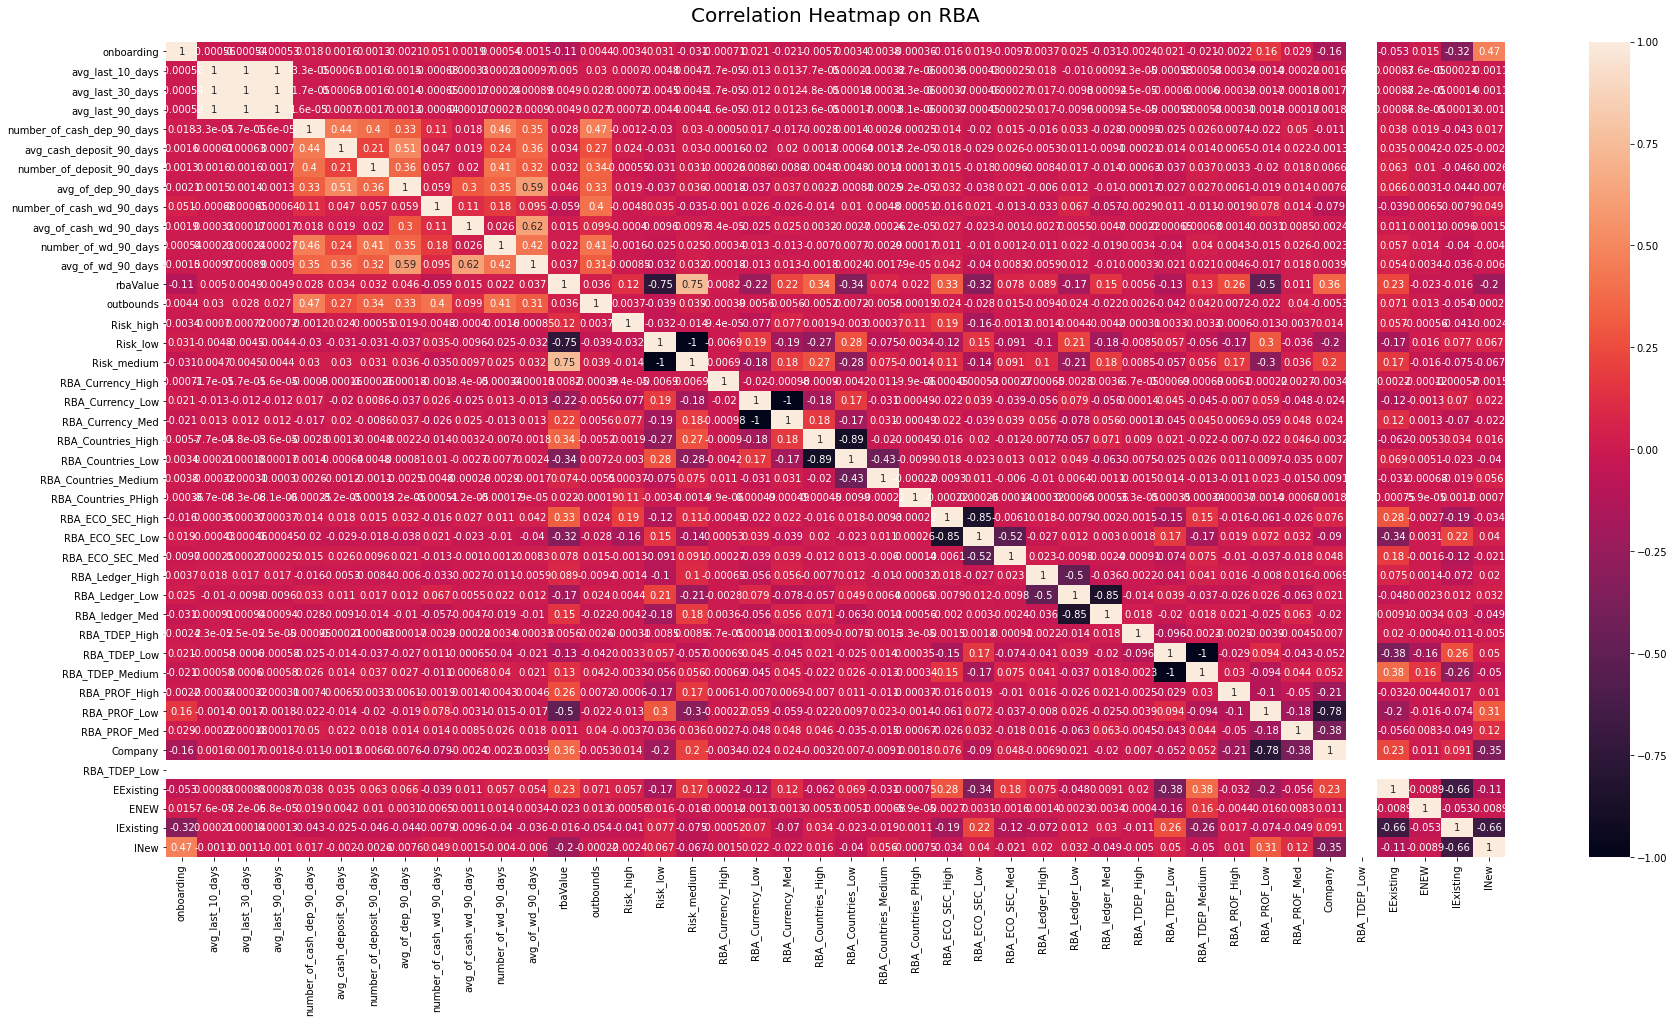

In [77]:
plt.figure(figsize=(30,15))
heatmap=sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap on RBA', fontdict={'fontsize':20},pad=20)

In [126]:
#dropping all highly correlated variables 
df1 = df1.drop(['avg_last_10_days','avg_last_30_days','number_of_wd_90_days','number_of_deposit_90_days'], axis = 1)

KeyError: "['avg_last_10_days' 'avg_last_30_days' 'number_of_wd_90_days'\n 'number_of_deposit_90_days'] not found in axis"

In [127]:
df3 = df1[df1.customerType  == "2"]

In [128]:
df3

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,avg_of_wd_90_days,rbaValue,Risk_Description,dateunix,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,RBA_TDEP_Low,EExisting,ENEW,IExisting,INew
9,202,20200217770000674,020200217770011400000,2,20131003,0,1,JO,19760404,0.0,0,2,0.0,-0.003621,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,Low,1380758400,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0
10,202,20200217770000674,020200217770011413000,2,20131003,0,1,JO,19760404,0.0,0,2,0.0,-0.003492,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,Low,1380758400,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0
11,202,20200217770000674,020200217770011924030,2,20131003,0,1,JO,19760404,0.0,0,2,0.0,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,Low,1380758400,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0
52,201,20100400520000069,020100400520021111006,2,20140218,0,1,JO,20140217,49.0,0,0,0.0,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,Low,1392681600,2579,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0
53,201,20100400520000069,020100400520021111008,2,20140218,0,1,JO,20140217,49.0,0,0,0.0,0.214283,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,Low,1392681600,2579,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201286,205,20500273440001981,020500273440013212000,2,20140318,0,1,JO,19730409,37.0,0,2,2.0,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.042925,Low,1395100800,17503,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0
201288,203,20301002410003092,020301002410010010001,2,20060522,0,1,JO,20060621,54.0,0,4,0.0,0.013258,6.789232,21.930190,50.813567,-0.229053,-0.018823,17.044929,1.855455,Medium,1148256000,5377,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0
201295,805,80527252030000212,080527252030010010000,2,20120307,0,1,JO,19711103,0.0,0,2,0.0,-0.003471,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.754818,Low,1331078400,18026,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0
201315,351,35100297860001291,035100297860010010000,2,20140603,0,1,JO,20140605,54.0,0,4,0.0,-0.002610,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,Low,1401753600,2471,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0


In [129]:
df4 = df1[df1.customerType  == "1"]

In [130]:
df4

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,avg_of_wd_90_days,rbaValue,Risk_Description,dateunix,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,RBA_TDEP_Low,EExisting,ENEW,IExisting,INew
0,202,20200207860000638,020200207860011330000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,Low,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,202,20200207860000638,020200207860011389002,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.001356,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,Low,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,202,20200207860000638,020200207860010060000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003651,0.777724,-0.019133,-0.034848,0.593402,-0.017110,-0.039468,-0.074961,Low,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,202,20200207860000638,020200207860010010000,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003688,0.777724,-0.019450,-0.034967,0.593402,-0.016904,-0.039366,-0.074961,Low,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,202,20200207860000638,020200207860011355003,1,20130917,0,1,JO,19890630,0.0,0,2,2.0,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,Low,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201331,208,20800885450011871,020800885450011389000,1,20180424,0,1,JO,19700611,51.0,0,2,1.0,-0.000772,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.837872,Low,1524528000,18536,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
201332,502,50200388440002560,050200388440010010000,1,20150226,0,1,JO,19871120,51.0,0,15,2.0,-0.003693,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,1.016608,Medium,1424908800,12165,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
201333,404,40400811920003507,040400811920010020000,1,20171022,0,1,JO,19530607,0.0,0,2,1.0,-0.002284,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.122420,Low,1508630400,24749,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
201334,704,70424500690004664,070424500690011396000,1,20080116,0,1,JO,19490101,0.0,0,2,2.0,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,0.826770,Medium,1200441600,26367,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0


  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Regression</div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Ridge </div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature selection </div> 

In [131]:
#Dropping duplicate values 
df1 = df1.drop(['age'],axis = 1)

KeyError: "['age'] not found in axis"

In [136]:
from sklearn.model_selection import train_test_split
#only numerical collumns ! integer or the value is too big; no n/a
df1_regr = pd.DataFrame()
for col in df1.columns:
    try:
        df1_regr[col] = pd.to_numeric(df1[col], downcast="integer")
    except:
        print(col)
        continue
   

X = df1_regr.loc[:, (df1_regr.columns != 'rbaValue') & (df1_regr.columns != 'Risk_Description') & (df1_regr.columns != 'Risk_high') & (df1_regr.columns != 'Risk_low') & (df1_regr.columns != 'Risk_medium')]
y = df1_regr.loc[:,'rbaValue']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
df1_regr.head()

fullaccount
residentCountry
Risk_Description
RBA_TDEP_Low
RBA_TDEP_Low


,branchCode,customerId,customerType,creationDate,onboarding,residentStatus,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,avg_of_wd_90_days,rbaValue,dateunix,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,EExisting,ENEW,IExisting,INew
0,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.001356,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003651,0.777724,-0.019133,-0.034848,0.593402,-0.017110,-0.039468,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003688,0.777724,-0.019450,-0.034967,0.593402,-0.016904,-0.039366,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [137]:
#grouped value
df2_regr = pd.DataFrame()
for col in df2.columns:
    try:
        df2_regr[col] = pd.to_numeric(df2[col], downcast="integer")
    except:
        print(col)
        continue
   

Xg = df2_regr.loc[:, (df2_regr.columns != 'rbaValue') & (df2_regr.columns != 'Risk_Description') & (df2_regr.columns != 'Risk_high') & (df2_regr.columns != 'Risk_low') & (df2_regr.columns != 'Risk_medium')]
yg = df2_regr.loc[:,'rbaValue']

X_traing, X_testg, Y_traing, Y_testg = train_test_split(Xg, yg, test_size=0.30, random_state=42)
df2_regr.head()

residentCountry
Risk_Description


,,,,residentStatus,companyType,jointAccount,CUS_CLASS,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue,dateunix,age,age_inday,outbounds,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,EExisting,ENEW,IExisting,INew
customerId,customerType,GENDER,Company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20100400520000069,2,0.0,1,1,49,0,0,0.194328,0.195400,0.195814,-0.677221,-0.219548,-0.346458,-0.248319,-1.374321,-0.112936,-0.450953,-0.241908,-0.517521,1392681600,4,2579,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
20100400540000071,2,0.0,1,1,35,0,4,0.127829,0.128688,0.129051,-0.564351,-0.182956,-0.288715,-0.206932,-1.145267,-0.094113,-0.375794,-0.201590,-0.754818,1425945600,14,6058,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
20100400600000077,1,0.0,1,1,36,0,4,0.265159,0.266006,0.266214,-0.451481,-0.146365,-0.230972,-0.165546,-0.916214,-0.075290,-0.300635,-0.161272,0.275053,1431820800,3,2178,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
20100532940000099,1,0.0,1,1,0,0,2,448.031806,448.424093,448.541172,-1.354443,-0.439095,-0.692916,-0.496637,-2.748641,-0.225871,-0.901906,-0.483816,1.633582,1387843200,69,26002,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0
20101002700000133,1,1.0,1,1,0,0,0,6.512368,6.493811,6.625094,2.362558,46.484577,13.085064,60.875823,4.444565,15.525515,3.837175,38.086762,2.855664,1378771200,50,19359,5,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [138]:
#Company value
df3_regr = pd.DataFrame()
for col in df3.columns:
    try:
        df3_regr[col] = pd.to_numeric(df3[col], downcast="integer")
    except:
        print(col)
        continue
   

XC = df3_regr.loc[:, (df3_regr.columns != 'rbaValue') & (df3_regr.columns != 'Risk_Description') & (df3_regr.columns != 'Risk_high') & (df3_regr.columns != 'Risk_low') & (df3_regr.columns != 'Risk_medium')]
yC = df3_regr.loc[:,'rbaValue']

X_trainC, X_testC, Y_trainC, Y_testC = train_test_split(XC, yC, test_size=0.30, random_state=42)
df3_regr.head()

fullaccount
residentCountry
Risk_Description
RBA_TDEP_Low
RBA_TDEP_Low


,branchCode,customerId,customerType,creationDate,onboarding,residentStatus,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,avg_of_wd_90_days,rbaValue,dateunix,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,EExisting,ENEW,IExisting,INew
9,202,20200217770000674,2,20131003,0,1,19760404,0,0,2,0,-0.003621,-0.11287,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,1380758400,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
10,202,20200217770000674,2,20131003,0,1,19760404,0,0,2,0,-0.003492,-0.11287,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,1380758400,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
11,202,20200217770000674,2,20131003,0,1,19760404,0,0,2,0,-0.003694,-0.11287,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,1380758400,16412,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
52,201,20100400520000069,2,20140218,0,1,20140217,49,0,0,0,-0.003694,-0.11287,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,1392681600,2579,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
53,201,20100400520000069,2,20140218,0,1,20140217,49,0,0,0,0.214283,-0.11287,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.517521,1392681600,2579,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [139]:
#Company value
df4_regr = pd.DataFrame()
for col in df4.columns:
    try:
        df4_regr[col] = pd.to_numeric(df4[col], downcast="integer")
    except:
        print(col)
        continue
   

XCu = df4_regr.loc[:, (df4_regr.columns != 'rbaValue') & (df4_regr.columns != 'Risk_Description') & (df4_regr.columns != 'Risk_high') & (df4_regr.columns != 'Risk_low') & (df4_regr.columns != 'Risk_medium')]
yCu = df4_regr.loc[:,'rbaValue']

X_trainCu, X_testCu, Y_trainCu, Y_testCu = train_test_split(XCu, yCu, test_size=0.30, random_state=42)
df4_regr.head()

fullaccount
residentCountry
Risk_Description
RBA_TDEP_Low
RBA_TDEP_Low


,branchCode,customerId,customerType,creationDate,onboarding,residentStatus,dateOfBirth,companyType,jointAccount,CUS_CLASS,GENDER,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,avg_of_wd_90_days,rbaValue,dateunix,age_inday,outbounds,deposits_dummies,withdrawals_dummies,Risk_high,Risk_low,Risk_medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Countries_PHigh,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,RBA_TDEP_High,RBA_TDEP_Medium,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,Company,EExisting,ENEW,IExisting,INew
0,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.001356,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003651,0.777724,-0.019133,-0.034848,0.593402,-0.017110,-0.039468,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003688,0.777724,-0.019450,-0.034967,0.593402,-0.016904,-0.039366,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,202,20200207860000638,1,20130917,0,1,19890630,0,0,2,2,-0.003694,-0.112870,-0.036591,-0.041386,-0.229053,-0.018823,-0.040318,-0.074961,1379376000,11577,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0


## Feature selection by feature importance 

In [156]:
initial_lm_mod = Ridge(alpha = 1,normalize=True)
initial_lm_mod.fit(X_train,Y_train)
init = initial_lm_mod.score(X_train, Y_train)
print("Initial cleaned dataset score: " + str(init))
#checking for grouped values 
initial_lm_mod_grouped = Ridge(alpha = 1,normalize=True)
initial_lm_mod_grouped.fit(X_traing,Y_traing)
grouped = initial_lm_mod_grouped.score(X_traing, Y_traing)
print("Grouped customer score: " + str(grouped))
#Checking for company values 
initial_lm_mod_cie = Ridge(alpha = 1,normalize=True)
initial_lm_mod_cie.fit(X_trainC,Y_trainC)
sc_cie = initial_lm_mod_cie.score(X_trainC, Y_trainC)
print("Company split score: " + str(sc_cie))
#Checking for customers values 
initial_lm_mod_cust = Ridge(alpha = 1,normalize=True)
initial_lm_mod_cust.fit(X_trainCu,Y_trainCu)
sc_cu = initial_lm_mod_cust.score(X_trainCu, Y_trainCu)
print("Customer split score: " + str(sc_cu))
comb = (sc_cu + sc_cie)/2
print("Combined splitting score: " + str(comb))

best_sc = {"initial model":init, "Combined model": comb, "Grouped model": grouped}
print('')
print("The best model is " + str(min(best_sc, key=best_sc.get)))

Initial cleaned dataset score: 0.505745172814837
Grouped customer score: 0.5533476228080335
Company split score: 0.5137090292022556
Customer split score: 0.49820178349360733
Combined splitting score: 0.5059554063479315

The best model is initial model


In [148]:
def get_feature_importance(clf, feature_names):
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_# Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [84]:
get_feature_importance(initial_lm_mod, X_train.columns)

,variable,coefficient
29,RBA_Countries_PHigh,4.660000
30,RBA_ECO_SEC_High,1.040000
23,RBA_Currency_High,0.900000
38,RBA_PROF_High,0.800000
26,RBA_Countries_High,0.550000
5,residentStatus,0.380000
25,RBA_Currency_Med,0.200000
33,RBA_Ledger_High,0.200000
41,Company,0.200000
28,RBA_Countries_Medium,0.170000


In [85]:
#grouped values 
get_feature_importance(initial_lm_mod_grouped, X_traing.columns)

,variable,coefficient
19,Risk_high,2.890000
28,RBA_ECO_SEC_High,0.590000
25,RBA_Countries_High,0.430000
34,RBA_PROF_High,0.410000
21,Risk_medium,0.380000
0,residentStatus,0.350000
31,RBA_Ledger_High,0.160000
27,RBA_Countries_Medium,0.160000
30,RBA_ECO_SEC_Med,0.150000
22,RBA_Currency_High,0.150000


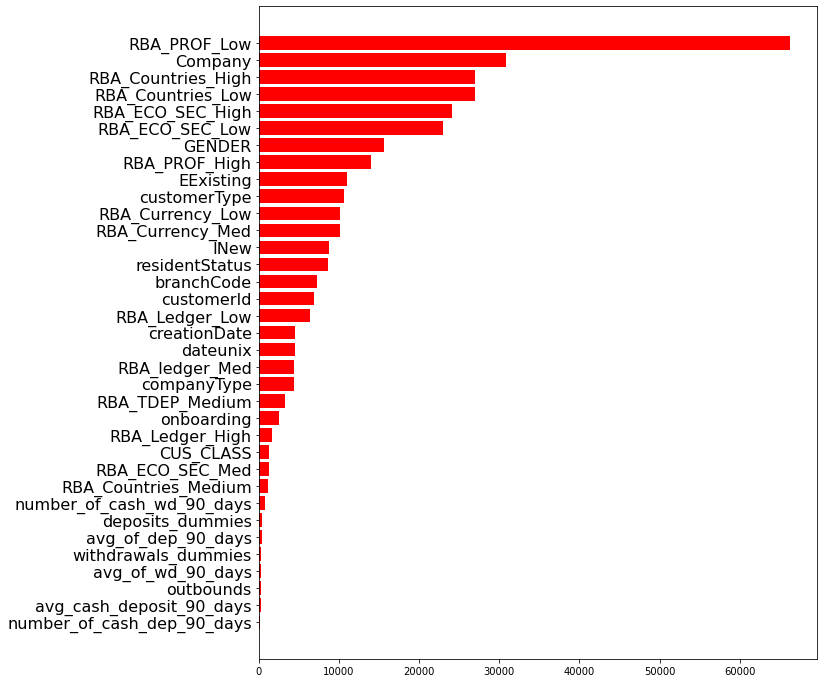

In [86]:
from sklearn import feature_selection
kbest = 35    #= 70% of collumns
ig_selector = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=80).fit(X, y)
# Get the indices sorted by most important to least important
indices = np.argsort(ig_selector.scores_)[::-1]

ig_features = []
for i in range(len(X.columns)):
    ig_features.append(X.columns[indices[i]])


plt.figure(figsize=(10,12))
plt.yticks(rotation='horizontal',fontsize=16)
plt.barh(ig_features[0:kbest], ig_selector.scores_[indices[range(kbest)]], color='r', align='center')
plt.gca().invert_yaxis()
plt.show()

In [87]:
# feature selection function for future use 
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = ig_selector = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=70).fit(X, y)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Model evaluation </div> 

In [88]:
#check other models 
for method in [LinearRegression(),Ridge(),Lasso(),BayesianRidge(),ElasticNet()]:
    model = method
    model.fit(X_train, Y_train)
    model_test_yhat = model.predict(X_test)
    print(model,mean_squared_error(Y_test,model_test_yhat))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.9199609027403791


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2512e-38): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 0.42652010060505946


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65946.44121089345, tolerance: 14.10276967989151
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 0.9228992954222196
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 0.8706616205146602
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 0.921390881697682


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65615.52297143727, tolerance: 14.10276967989151
  positive)


In [89]:
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
grid = {
    "alpha": [0.01,0.05,0.1,0.2,0.5,1] 
}

"Sklearn"
"-----------------------"
grid_search = GridSearchCV(Ridge(), param_grid = grid)
grid_search.fit(X_train_fs, Y_train)
optimal_model = grid_search.best_estimator_
"-----------------------"

print("Fine Tuned Model: {0}".format(optimal_model))

C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60898e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60532e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6075e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60845e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (r

Fine Tuned Model: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60821e-38): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28619e-40): result may not be accurate.
  overwrite_a=True).T


  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Cross validation </div> 

Predicting rba value

In [90]:
#training the model  witht he best alpha and selected features 
#Ridge regression model
model = Ridge(alpha = optimal_model.alpha,normalize = True)
model.fit(X_train_fs,Y_train)
#Cross validation
scores = cross_val_score(model, X_train_fs, Y_train, cv=5)
print(scores)
interval = str(min(scores)) + str(max(scores)) 

[0.56325255 0.56034153 0.58149385 0.57362544 0.55588778]


In [91]:
#Testing the model 
y_new = model.predict(X_test_fs)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_new))
print('Root Mean squared error: %.2f'
      % sqrt(mean_absolute_error(Y_test,y_new)))
print('Mean absolute error: %.2f'
      %mean_absolute_error(Y_test,y_new))

Mean squared error: 0.43
Root Mean squared error: 0.70
Mean absolute error: 0.50


## Plotting the results

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(Y_test, y_new, color='b', label = None,linewidths = 0.5)
plt.rcParams['figure.figsize'] = 30, 10
plt.xlim(-1, 6)
plt.ylim(-1, 6)
z = np.polyfit(Y_test, y_new, 1)
y_hat = np.poly1d(z)(Y_test)
plt.plot(Y_test, y_hat, "r--", lw=3, label = 'Predicted value')
plt.plot([0, 6], [0, 6], color = 'g', linewidth = 3, label = 'Correct value')
plt.legend(bbox_to_anchor=(1.3, 0.80), loc='center', borderaxespad=0., fontsize = 15)
plt.xlabel('Predicted Y values',fontsize = 16)
plt.ylabel('Correct Y values',fontsize = 16)
plt.title('Predicted to correct Y values (test)',fontsize = 18)
plt.show()

- We can deduce that are prediction are overall lower than correct values 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">   Classification</div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Decision tree </div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature selection </div> 

In [ ]:
df1.loc[:,'Risk_Description']

In [ ]:
df1_class = df1.copy()
le = LabelEncoder()
le.fit(df1_class.loc[:,'Risk_Description'])
LabelEncoder()
list(le.classes_)
encodedrisk = le.transform(df1_class.loc[:,'Risk_Description'])
encodeddf = pd.DataFrame({'riskencoded':encodedrisk})
#set dummy values for onboarding
def categorizeC(text):
    if text == 0:
        text = 2
    return text 
encodeddf['riskencoded'] = np.vectorize(categorizeC)(encodeddf['riskencoded'])
#0 is low
#1 is high - medium
list(le.inverse_transform(encodeddf['riskencoded']))[0:10]

In [ ]:
encodeddf['riskencoded'].nunique()

In [ ]:
df1_class.loc[:,'Classifiedrisk'] = encodeddf['riskencoded']

In [ ]:
# dropping duplicate features 
df1_class = df1_class.drop(['fullaccount','residentCountry','Risk_Description'], axis = 1)

In [ ]:
df1_class.iloc[:,22]

In [ ]:
X = df1_class.loc[:, (df1_class.columns != 'Classifiedrisk') & (df1_class.columns != 'rbaValue') & (df1_class.columns != 'Risk_high') & (df1_class.columns != 'Risk_low') & (df1_class.columns != 'Risk_medium')]
y = df1_class.loc[:,'Classifiedrisk']
X_trainC, X_testC, Y_trainC, Y_testC = train_test_split(X, y, test_size=0.33, random_state=42)

print(X)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_trainC, Y_trainC)
y_pred_test = dt_clf.predict(X_testC)

In [ ]:
np.unique(y_pred_test, return_counts = True)

In [ ]:
dt_clf.get_params()

In [ ]:
confusion_matrix(y_pred_test, Y_testC)

In [ ]:
dt_cf_matrix = metrics.confusion_matrix(Y_testC, y_pred_test)
sns.heatmap(dt_cf_matrix, annot=True, fmt='g')
plt.show()

In [ ]:
#testing
dt_accuracy_test=metrics.accuracy_score(y_pred_test, Y_testC)
dt_f1_test=metrics.f1_score(Y_testC, y_pred_test)
dt_precision_test=metrics.precision_score(Y_testC, y_pred_test)
dt_recall_test=metrics.recall_score(Y_testC, y_pred_test)
dt_accuracy_test
print("Accuracy Score (Testing):",dt_accuracy_test)
print("F1 Score (Testing):",dt_f1_test)
print("Precision (Testing):",dt_precision_test)
print("Recall (Testing):",dt_recall_test)

In [ ]:
importances = dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Model evaluation </div> 

In [ ]:
X_trainC_fs, X_testC_fs, fs = select_features(X_trainC, Y_trainC, X_testC)
grid = {
    "max_depth": [30,35], 
    "min_samples_leaf": [1,2,3],
    "min_samples_split": [2,3,4]
}

"Sklearn"
"-----------------------"
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = grid)
grid_search.fit(X_trainC_fs, Y_trainC)
optimal_model = grid_search.best_estimator_
"-----------------------"

print("Fine Tuned Model: {0}".format(optimal_model))

In [ ]:
model = DecisionTreeClassifier(max_depth = optimal_model.max_depth, min_samples_leaf = optimal_model.min_samples_leaf, min_samples_split = optimal_model.min_samples_split)
model.fit(X_trainC_fs,Y_trainC)

In [ ]:
adjusted_pred = model.predict(X_testC_fs)

In [ ]:
#testing
dt_accuracy_test=metrics.accuracy_score(adjusted_pred, Y_testC)
dt_f1_test=metrics.f1_score(Y_testC, adjusted_pred)
dt_precision_test=metrics.precision_score(Y_testC, adjusted_pred)
dt_recall_test=metrics.recall_score(Y_testC, adjusted_pred)
dt_accuracy_test
print("Accuracy Score (Testing):",dt_accuracy_test)
print("F1 Score (Testing):",dt_f1_test)
print("Precision (Testing):",dt_precision_test)
print("Recall (Testing):",dt_recall_test)

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Cross validation </div> 

In [ ]:
#Cross validation
scores = cross_val_score(model, X_trainC_fs, Y_trainC, cv=5)
print(scores)
interval = str(min(scores)) + str(max(scores)) 